# Visualizing proteins as graph

adapted from [here](https://colab.research.google.com/github/a-r-j/graphein/blob/master/notebooks/residue_graphs.ipynb#scrollTo=WPXsxtgwKGKF)

In [4]:
!pip install graphein
!pip install -U kaleido

In [4]:
!sudo apt-get install pymol

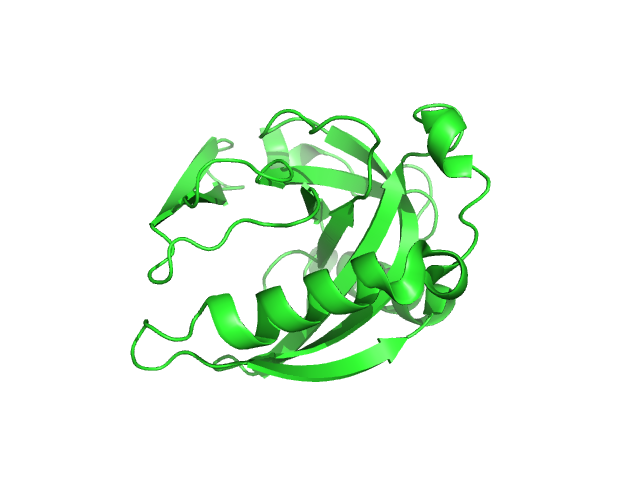

In [1]:
# Plotting the pdb
from graphein.utils.pymol import MolViewer
pymol = MolViewer()
pymol.delete("all") # delete all objects from other sessions if necessary.
pymol.fetch("3eiy")
pymol.show_as("cartoon")
pymol.display()

In [2]:
from graphein.protein.config import ProteinGraphConfig

config = ProteinGraphConfig()
params_to_change = {"granularity": "centroids"}
config = ProteinGraphConfig(**params_to_change)

[08/26/24 10:23:15] WARNING  To use the Graphein submodule                                         ]8;id=490485;file:///usr/local/lib/python3.10/dist-packages/graphein/protein/features/sequence/embeddings.py\embeddings.py]8;;\:]8;id=446115;file:///usr/local/lib/python3.10/dist-packages/graphein/protein/features/sequence/embeddings.py#45\45]8;;\
                             graphein.protein.features.sequence.embeddings, you need to install:                   
                             biovec                                                                                
                             To do so, use the following command: pip install biovec                               
                             Alternatively, you can install graphein with the extras:                              
                                                                                                                   
                             pip install graphein[extras]                                                          

                    WARNING  To use the Graphein submodule graphein.protein.visualisation, you  ]8;id=584437;file:///usr/local/lib/python3.10/dist-packages/graphein/protein/visualisation.py\visualisation.py]8;;\:]8;id=810398;file:///usr/local/lib/python3.10/dist-packages/graphein/protein/visualisation.py#36\36]8;;\
                             need to install: pytorch3d                                                            
                             pytorch3d cannot be installed via pip                                                 

                    WARNING  To use the Graphein submodule graphein.protein.meshes, you need to        ]8;id=329185;file:///usr/local/lib/python3.10/dist-packages/graphein/protein/meshes.py\meshes.py]8;;\:]8;id=447589;file:///usr/local/lib/python3.10/dist-packages/graphein/protein/meshes.py#30\30]8;;\
                             install: pytorch3d                                                                    
                             To do so, use the following command: pip install pytorch3d                            

Output()

[08/26/24 10:23:16] DEBUG    Deprotonating protein. This removes H atoms from the pdb_df dataframe    ]8;id=568839;file:///usr/local/lib/python3.10/dist-packages/graphein/protein/graphs.py\graphs.py]8;;\:]8;id=980791;file:///usr/local/lib/python3.10/dist-packages/graphein/protein/graphs.py#188\188]8;;\

                    DEBUG    Converting dataframe to centroids. This averages XYZ coords of the       ]8;id=39738;file:///usr/local/lib/python3.10/dist-packages/graphein/protein/graphs.py\graphs.py]8;;\:]8;id=301485;file:///usr/local/lib/python3.10/dist-packages/graphein/protein/graphs.py#210\210]8;;\
                             atoms in a residue                                                                    

/usr/local/lib/python3.10/dist-packages/graphein/protein/graphs.py:644: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will 
default to False. Either specify numeric_only or select only columns which should be valid for the function.

                    DEBUG    Calculated 174 centroid nodes                                            ]8;id=332657;file:///usr/local/lib/python3.10/dist-packages/graphein/protein/graphs.py\graphs.py]8;;\:]8;id=794376;file:///usr/local/lib/python3.10/dist-packages/graphein/protein/graphs.py#649\649]8;;\

                    DEBUG    Detected 174 total nodes                                                 ]8;id=828800;file:///usr/local/lib/python3.10/dist-packages/graphein/protein/graphs.py\graphs.py]8;;\:]8;id=373041;file:///usr/local/lib/python3.10/dist-packages/graphein/protein/graphs.py#435\435]8;;\

                    DEBUG    Reading meiler embeddings from:                                       ]8;id=375735;file:///usr/local/lib/python3.10/dist-packages/graphein/protein/features/nodes/amino_acid.py\amino_acid.py]8;;\:]8;id=711425;file:///usr/local/lib/python3.10/dist-packages/graphein/protein/features/nodes/amino_acid.py#58\58]8;;\
                             /usr/local/lib/python3.10/dist-packages/graphein/protein/features/nod                 
                             es/meiler_embeddings.csv                                                              

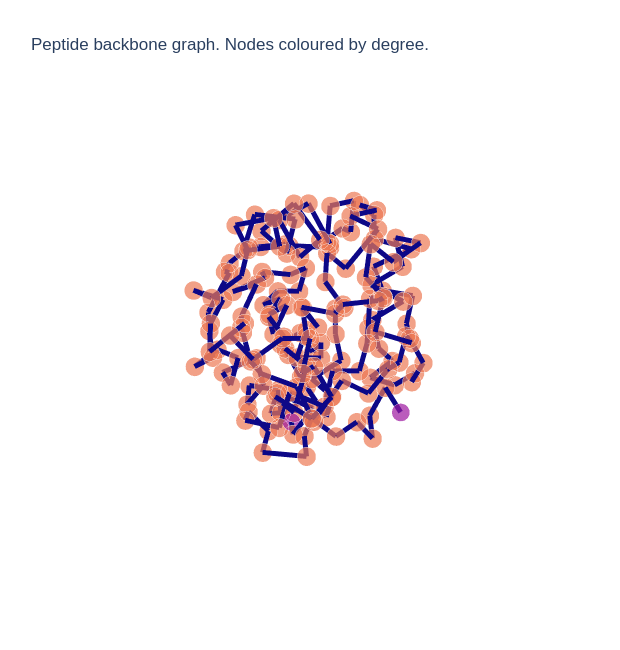

In [3]:
import plotly.io as pio
pio.renderers.default = 'colab'
from graphein.protein.graphs import construct_graph

g = construct_graph(config=config, pdb_code="3eiy")
from graphein.protein.visualisation import plotly_protein_structure_graph

p = plotly_protein_structure_graph(
    g,
    colour_edges_by="kind",
    colour_nodes_by="degree",
    label_node_ids=False,
    plot_title="Peptide backbone graph. Nodes coloured by degree.",
    node_size_multiplier=1
    )
p.show()

# This for plotting in Colab

# Save the plot as an image
p.write_image("protein_structure.png")

# Display the image
from IPython.display import Image
Image("protein_structure.png")

In [9]:
!pip install -U kaleido

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 6.3 MB/s eta 0:00:00


In [7]:
import plotly.express as px
df = px.data.iris()
fig = px.scatter(df, x='sepal_width', y='sepal_length')
fig.show()